## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X, Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
 - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [5]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [6]:
ndf.horsepower[ndf.horsepower == '?'] = np.nan # NAN 으로 값 변경
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [7]:
ndf.to_pickle('auto-mpg.pkl')

In [36]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 11)
X_train

,weight
105,4654
226,3425
276,2795
336,2905
184,2572
...,...
269,2230
337,2290
91,4464
80,2395


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

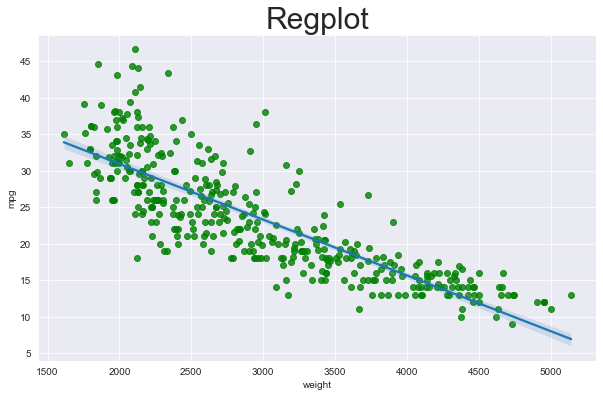

In [9]:
sns.set_style('darkgrid')

fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight',y='mpg',data=ndf, scatter_kws={'color':'green'})

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)



In [11]:
print(f' 기울기: {lr.coef_}')
print(f' 절편: {lr.intercept_}')

 기울기: [-0.00762163]
 절편: 45.97121770475769


<AxesSubplot:xlabel='mpg', ylabel='Density'>

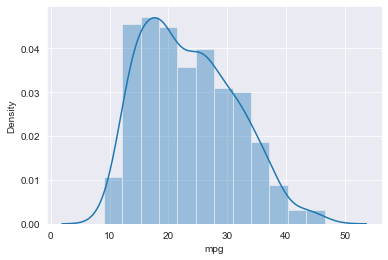

In [13]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

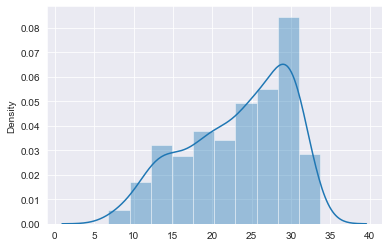

In [14]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

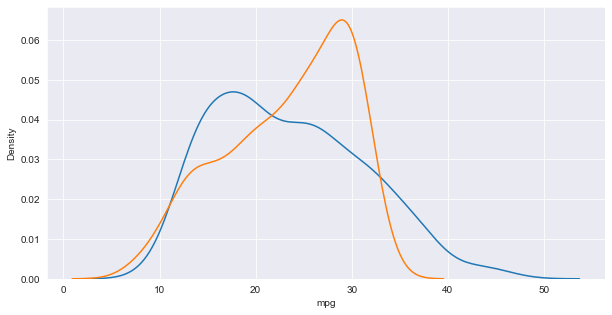

In [15]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [16]:
import pandas as pd
df = pd.read_excel("auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [17]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 10)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [19]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(278, 1)
(278, 3)


In [20]:
X_train_poly[:5]

array([[1.0000000e+00, 2.7200000e+03, 7.3984000e+06],
       [1.0000000e+00, 4.6150000e+03, 2.1298225e+07],
       [1.0000000e+00, 2.1350000e+03, 4.5582250e+06],
       [1.0000000e+00, 3.6200000e+03, 1.3104400e+07],
       [1.0000000e+00, 2.4510000e+03, 6.0074010e+06]])

In [21]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [22]:


pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.72554701541758

In [23]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -1.69114181e-02  1.43451114e-06]
60.405921782601645


In [24]:
X_test

,weight
331,2145
111,2124
350,2215
205,2155
56,1955
...,...
17,2587
225,3520
223,4140
59,2254


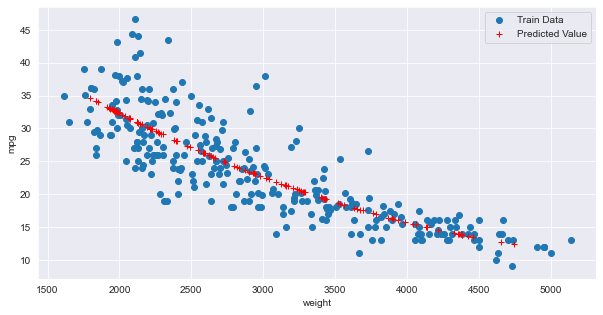

In [25]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train.to_numpy(), y_train.to_numpy(), 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test.to_numpy(), y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [26]:
# 0 ~ 1 균일분포
import numpy as np
np.random.rand(100,1)

array([[0.55514957],
       [0.71947024],
       [0.95941828],
       [0.92808303],
       [0.77024743],
       [0.71709453],
       [0.56487702],
       [0.95622582],
       [0.55399697],
       [0.19778574],
       [0.78468927],
       [0.28761332],
       [0.75864684],
       [0.78563861],
       [0.6214784 ],
       [0.92902088],
       [0.72068722],
       [0.23712936],
       [0.50325399],
       [0.58903156],
       [0.20019338],
       [0.51085206],
       [0.89887658],
       [0.3835806 ],
       [0.43884822],
       [0.5924918 ],
       [0.03520228],
       [0.37795543],
       [0.14629358],
       [0.08922028],
       [0.67598096],
       [0.72132453],
       [0.02633901],
       [0.87307843],
       [0.85493966],
       [0.06575067],
       [0.44985289],
       [0.97465628],
       [0.91123789],
       [0.21188723],
       [0.39294278],
       [0.21150598],
       [0.00253254],
       [0.70842744],
       [0.49492714],
       [0.0782663 ],
       [0.91224522],
       [0.302

In [27]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

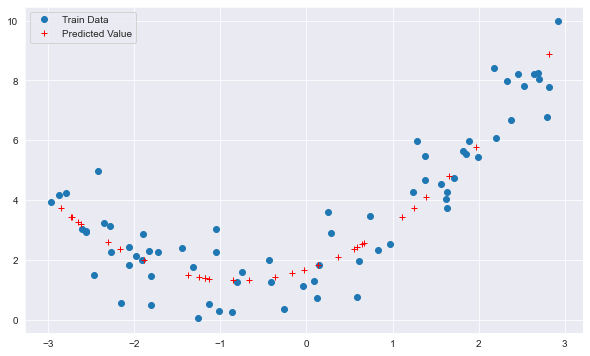

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [29]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [30]:
df = pd.read_pickle('auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [31]:
X = df.drop('mpg',axis=1)
y =df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)


In [32]:
# Q. mse, rmse, r_square(r2_score) 기울기, 절편

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse}, rmse: {rmse}, r_square: {r_square}')
print(f' 기울기: {lr.coef_}')
print(f' 절편: {lr.intercept_}')

mse: 17.330085628989945, rmse: 4.16294194398504, r_square: 0.6939048496695599
 기울기: [-0.60691288 -0.03714088 -0.00522268]
 절편: 46.414351269634025


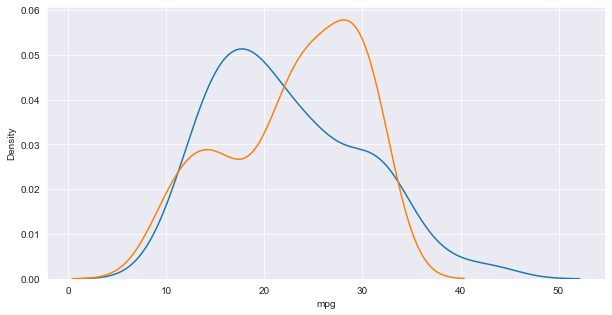

In [33]:
# [과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화

y_hat = lr.predict(X_test)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test") 
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

